In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset
#read in the pima-indians-diabetese.xlsx dataset
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)



In [57]:
#converting quantitative variables into qualitative variables using cut function in pandas
airQualityDataSet["NO2_ONCENTRATION"] = pd.cut(airQualityDataSet["NO2(GT)"],
bins=[airQualityDataSet["NO2(GT)"].min()-1, 50, 100, airQualityDataSet["NO2(GT)"].max() +1],
                                                labels=["Low", "Medium","High"])

In [58]:
airQualityDataSet.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,NO2_ONCENTRATION
184,2004-03-18,10:00:00,4.5,1616.50,-200,21.312687,1332.50,349.0,685.75,150.0,2010.00,1818.50,17.850000,40.525,0.820964,High
185,2004-03-18,11:00:00,2.8,1472.75,-200,14.305786,1126.50,224.0,830.50,152.0,1752.00,1567.75,20.800001,34.450,0.836456,High
186,2004-03-18,12:00:00,2.2,1378.50,-200,12.521106,1067.50,171.0,898.75,139.0,1662.50,1373.50,23.850000,28.175,0.821851,High
187,2004-03-18,13:00:00,2.2,1385.25,-200,12.192364,1056.25,149.0,891.00,133.0,1648.00,1267.50,24.150000,28.675,0.851493,High
188,2004-03-18,14:00:00,2.3,1378.75,-200,13.092245,1086.75,137.0,901.25,126.0,1660.25,1143.50,25.150001,24.850,0.782925,High


In [59]:

airQualityDataSet = airQualityDataSet.drop(["Date", "Time" , "NMHC(GT)","C6H6(GT)", "PT08.S3(NOx)","NO2(GT)" ,"PT08.S1(CO)","PT08.S2(NMHC)" , "PT08.S4(NO2)", "T","RH","AH"], axis=1)


In [60]:
airQualityDataSet.head()

,CO(GT),NOx(GT),PT08.S5(O3),NO2_ONCENTRATION
184,4.5,349.0,1818.50,High
185,2.8,224.0,1567.75,High
186,2.2,171.0,1373.50,High
187,2.2,149.0,1267.50,High
188,2.3,137.0,1143.50,High


classes are:  ['High', 'Medium', 'Low']
Confusion Matrix is 
[[696   0  53]
 [  4  53  47]
 [158  12 343]]


              precision    recall  f1-score   support

        High       0.81      0.93      0.87       749
         Low       0.82      0.51      0.63       104
      Medium       0.77      0.67      0.72       513

    accuracy                           0.80      1366
   macro avg       0.80      0.70      0.74      1366
weighted avg       0.80      0.80      0.79      1366



Confusion matrix, without normalization
[[696   0  53]
 [  4  53  47]
 [158  12 343]]
Normalized confusion matrix
[[0.92923899 0.         0.07076101]
 [0.03846154 0.50961538 0.45192308]
 [0.3079922  0.02339181 0.66861598]]


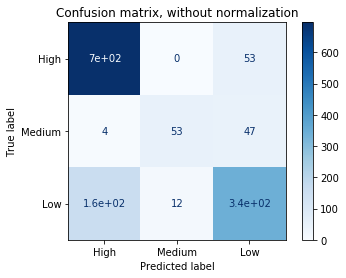

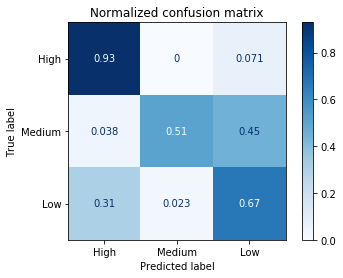

In [33]:
# Using mlp classifier for NO2(GT) concentration classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Load dataset and explore dataset
X = airQualityDataSet.drop("NO2_ONCENTRATION", axis=1)
Y = airQualityDataSet["NO2_ONCENTRATION"]
class_names = ["High","Medium","Low"]
print("classes are: ", class_names)

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)

#Fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html
#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [70]:
# Decision Tree for classification
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix



#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
#Load dataset and explore dataset
X = airQualityDataSet.drop("NO2_ONCENTRATION", axis=1)
Y = airQualityDataSet["NO2_ONCENTRATION"]

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))

#How to improve the accuracy of the model? By tuning the number of features for the model

#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")





Accuracy for 70% training set and 30% test set : 0.7443563148261135


[[728   2 158]
 [  4  86  34]
 [176  45 406]]


              precision    recall  f1-score   support

        High       0.80      0.82      0.81       888
         Low       0.65      0.69      0.67       124
      Medium       0.68      0.65      0.66       627

    accuracy                           0.74      1639
   macro avg       0.71      0.72      0.71      1639
weighted avg       0.74      0.74      0.74      1639





In [61]:
# SVM classification 
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

X = airQualityDataSet.drop("NO2_ONCENTRATION", axis=1)
Y = airQualityDataSet["NO2_ONCENTRATION"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42) # 70% training and 30% test


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")



Accuracy: 0.7876754118364857
Confusion Matrix is 
[[792   0 130]
 [  4  64  51]
 [143  20 435]]


              precision    recall  f1-score   support

        High       0.84      0.86      0.85       922
         Low       0.76      0.54      0.63       119
      Medium       0.71      0.73      0.72       598

    accuracy                           0.79      1639
   macro avg       0.77      0.71      0.73      1639
weighted avg       0.79      0.79      0.79      1639





In [68]:
#Using KNN Classifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = airQualityDataSet.drop("NO2_ONCENTRATION", axis=1)
Y = airQualityDataSet["NO2_ONCENTRATION"]

res = train_test_split(X, Y, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 

# Create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predicted, test_labels))

print("Confusion Matrix is ")
print(confusion_matrix(predicted, test_labels))
print("\n")
print(classification_report(predicted, test_labels))
print("\n")


Accuracy: 0.7712717291857274
Confusion Matrix is 
[[528   5 122]
 [  0  44  20]
 [ 64  39 271]]


              precision    recall  f1-score   support

        High       0.89      0.81      0.85       655
         Low       0.50      0.69      0.58        64
      Medium       0.66      0.72      0.69       374

    accuracy                           0.77      1093
   macro avg       0.68      0.74      0.70      1093
weighted avg       0.79      0.77      0.78      1093



